Acurácia: 0.99

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       149
           1       1.00      0.97      0.99       151

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Matriz de Confusão:
[[149   0]
 [  4 147]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   frequencia_palavras  1000 non-null   int64
 1   presenca_links       1000 non-null   int64
 2   num_anexos           1000 non-null   int64
 3   comprimento_email    1000 non-null   int64
 4   spam                 1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB
None


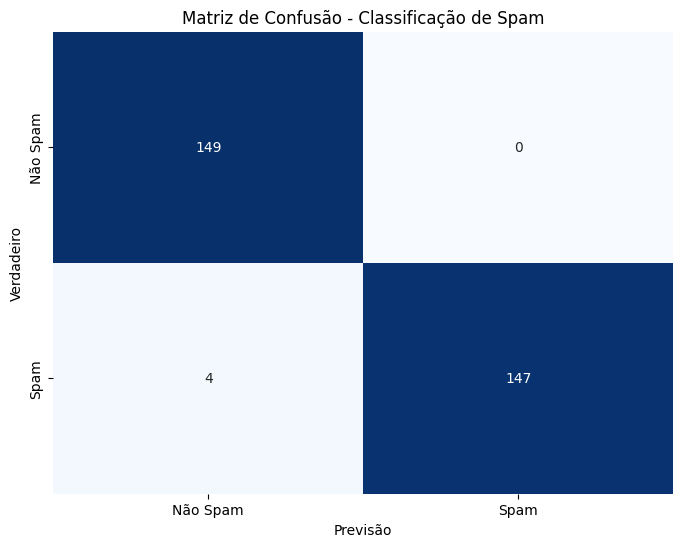

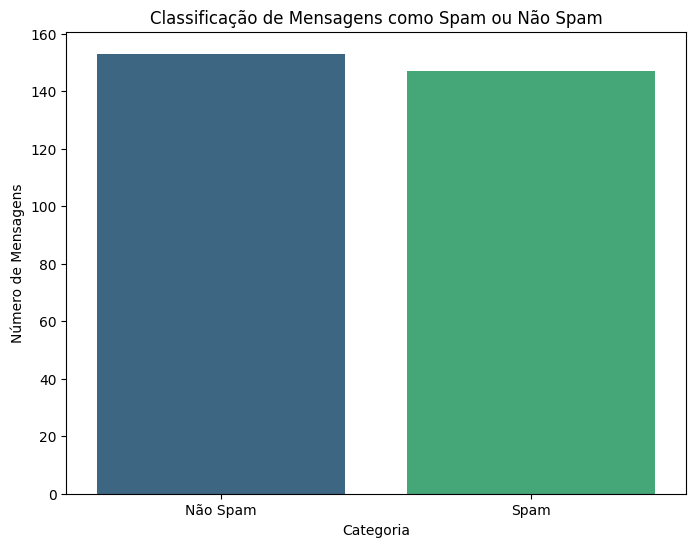

In [5]:
from sklearn.model_selection import train_test_split # biblioteca para treinar o modelo de dados
from sklearn.svm import SVC # importa a biblioteca SVM e o algoritmo SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # biblioteca para criar as métricas 
# do algoritmo
import pandas as pd # importa biblioteca pandas para leitura do dataframe
import seaborn as sns # importa a biblioteca seaborn para plotar a matriz de confusão
import matplotlib.pyplot as plt # importa a biblioteca matplotlib


# Separando as características (X) e o rótulo (y)
df = pd.read_csv('dadosspam.csv')
X = df.drop('spam', axis=1) # exclui a coluna spam
y = df['spam']

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # divide os dados em treino e teste

# Criando o modelo SVM
model = SVC(kernel='linear') # cria o modelo svc

# Treinando o modelo
model.fit(X_train, y_train) # treina o modelo

# Fazendo previsões
y_pred = model.predict(X_test) # realiza previsões

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibindo os resultados
print(f"Acurácia: {accuracy:.2f}")
print("\nRelatório de Classificação:")
print(classification_rep)
print("\nMatriz de Confusão:")
print(conf_matrix)
# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
print(df.info())
# cria matriz de confusão de forma visual xticks e yticks são os rótulos da matriz
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Não Spam', 'Spam'], yticklabels=['Não Spam', 'Spam']) 
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de Spam')
plt.show()
# Contagem de predições
spam_count = sum(y_pred)
non_spam_count = len(y_pred) - spam_count

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=['Não Spam', 'Spam'], y=[non_spam_count, spam_count], palette='viridis') # palete cor do gráfico
plt.xlabel('Categoria')
plt.ylabel('Número de Mensagens')
plt.title('Classificação de Mensagens como Spam ou Não Spam')
plt.show()


In [2]:
import numpy as np
import pandas as pd

# Definindo parâmetros
np.random.seed(42)  # Para reprodutibilidade
n_samples = 1000  # Número de amostras

# Gerando características aleatórias
# Frequência de palavras-chave como "oferta", "dinheiro", "grátis"
frequencia_palavras = np.random.randint(0, 10, n_samples)

# Presença de links (1 para presença, 0 para ausência)
presenca_links = np.random.randint(0, 2, n_samples)

# Número de anexos
num_anexos = np.random.randint(0, 5, n_samples)

# Comprimento do email em número de caracteres
comprimento_email = np.random.randint(20, 1000, n_samples)

# Label (0 = não spam, 1 = spam)
# Supomos que emails com alta frequência de palavras-chave, muitos links, etc., têm maior chance de serem spam
labels = (frequencia_palavras * 0.5 + presenca_links * 2 + num_anexos * 1.5 + comprimento_email * 0.001 > 7).astype(int)

# Criando um DataFrame
df = pd.DataFrame({
    'frequencia_palavras': frequencia_palavras,
    'presenca_links': presenca_links,
    'num_anexos': num_anexos,
    'comprimento_email': comprimento_email,
    'spam': labels
})

# Exibindo as primeiras linhas do DataFrame
df.head()
df.to_csv('dadosspam.csv', index=False)

In [3]:
df.head()

,frequencia_palavras,presenca_links,num_anexos,comprimento_email,spam
0,6,0,1,793,0
1,3,0,1,698,0
2,7,1,1,455,1
3,4,1,1,810,0
4,6,0,3,620,1
